In [7]:
PROJECT_NAME = "2"

batch_size = 32
img_height = 180
img_width = 180

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from pathlib import Path

data_dir = Path("/content/drive/MyDrive/OTH/space-eye/dataset/flattened_cropped")




Found 0 files belonging to 2 classes.
Using 0 files for training.


ValueError: ignored

float32 (32, 400, 400, 4)
float32 (32,)


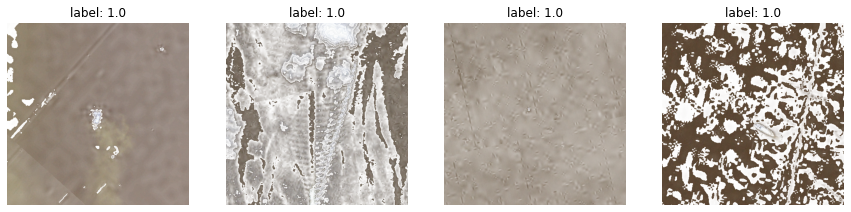

In [ ]:
images_train, labels_train = next(train_gen)

print(images_train.dtype, images_train.shape)
print(labels_train.dtype, labels_train.shape)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, figsize=(15,15))

for e,i in enumerate([0,7,16,31]):
  img_title = 'label: ' + str(labels_train[i])
  axs[e].imshow(images_train[i]), axs[e].axis('off'), axs[e].title.set_text(img_title)

plt.show()

In [ ]:
from tensorflow import keras
from functools import partial
from tensorflow.keras import layers, initializers, regularizers, Model

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def build_model():

  model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(400, 400 ,4)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(2, activation='softmax')
    keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', f1_m, metrics.Precision(), metrics.Recall()])


  # denseLayer = partial(layers.Dense, use_bias=False,
  #                      kernel_initializer='he_normal',
  #                      kernel_regularizer=regularizers.l2(1e-05))

  # convLayer = partial(layers.Conv2D, kernel_size=3, use_bias=False, padding='same',  
  #                     kernel_initializer='he_normal',
  #                     kernel_regularizer=regularizers.l2(1e-04))

  # batchLayer = partial(layers.BatchNormalization, center=True, scale=False)  # scale can be disabled when using ReLU

  # poolLayer = partial(layers.MaxPooling2D, pool_size=(2, 2))

# relu = partial(layers.Activation, activation='relu')

  # rms = optimizers.RMSprop(learning_rate=learning_rate)


  # # network architecture
  # input_ = layers.Input(shape=(400,400,4))

  # # conv part
  # conv_1_1 = convLayer(filters=64)(input_)
  # batch_1_1 = batchLayer()(conv_1_1)
  # act_1_1 = relu()(batch_1_1)

  # conv_1_2 = convLayer(filters=64)(act_1_1)
  # batch_1_2 = batchLayer()(conv_1_2)
  # act_1_2 = relu()(batch_1_2)
  # pool_1 = poolLayer()(act_1_2)

  # conv_2_1 = convLayer(filters=64)(pool_1)
  # batch_2_1 = batchLayer()(conv_2_1)
  # act_2_1 = relu()(batch_2_1)

  # conv_2_2 = convLayer(filters=64)(act_2_1)
  # batch_2_2 = batchLayer()(conv_2_2)
  # act_2_2 = relu()(batch_2_2)

  # conv_2_3 = convLayer(filters=64)(act_2_2)
  # res_1 = layers.Add()([pool_1, conv_2_3])
  # batch_res_1 = batchLayer()(res_1)
  # act_res_1 = relu()(batch_res_1)
  # pool_2 = poolLayer()(act_res_1)

  # conv_3_1 = convLayer(filters=128)(pool_2)
  # batch_3_1 = batchLayer()(conv_3_1)
  # act_3_1 = relu()(batch_3_1)

  # conv_3_2 = convLayer(filters=128)(act_3_1)
  # batch_3_2 = batchLayer()(conv_3_2)
  # act_3_2 = relu()(batch_3_2)

  # conv_3_3 = convLayer(filters=128)(act_3_2)
  # res_input_2 = convLayer(kernel_size=1, filters=128)(pool_2)
  # res_2 = layers.Add()([res_input_2, conv_3_3])
  # batch_res_2 = batchLayer()(res_2)
  # act_res_2 = relu()(batch_res_2)
  # pool_3 = poolLayer()(act_res_2)

  # flat = layers.Flatten()(pool_3)
  # drop_flat = layers.Dropout(0.2)(flat)

  # dense_1 = denseLayer(512)(drop_flat)
  # batch_d_1 = batchLayer()(dense_1)
  # act_d_1 = relu()(batch_d_1)
  # drop_1 = layers.Dropout(0.2)(act_d_1)

  # dense_2 = denseLayer(512)(drop_1)
  # batch_d_2 = batchLayer()(dense_2)
  # act_d_2 = relu()(batch_d_2)
  # drop_2 = layers.Dropout(0.2)(act_d_2)

  # output = denseLayer(1, activation='sigmoid')(drop_2)

  #model = Model(inputs=[input_], outputs=[output])

  #model.compile(loss="binary_crossentropy", optimizer=rms, 
  #            metrics=["accuracy", f1_m, metrics.Precision(), metrics.Recall()])

  return model

In [ ]:
import os, time
import tensorflow as tf
from tensorflow.keras import optimizers, callbacks, metrics
import keras.backend as K

# enable tensorboard
%load_ext tensorboard

tf.keras.backend.clear_session()
log_dir = os.path.join('/content/drive/MyDrive/OTH/space-eye/project', PROJECT_NAME, 'logs', time.strftime('%d_%m_%y-%H_%M'))
learning_rate = .000027 
epochs = 50

# to start tensorboard via console within the folder >> tensorboard --logdir=./tensorboard --port=6006
tensorboard_cb = callbacks.TensorBoard(log_dir)
checkpoint_cb = callbacks.ModelCheckpoint(os.path.join('/content/drive/MyDrive/OTH/space-eye/project', PROJECT_NAME, 'model'), save_best_only=True, monitor='val_loss')
early_stopping_cb = callbacks.EarlyStopping(patience=10)

model = build_model()

history = model.fit(train_gen, epochs=epochs, validation_data=validation_gen,
                    callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb]) 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/50
15/44 [=========>....................] - ETA: 7:27 - loss: 2.4073 - accuracy: 0.5084 - f1_m: 0.3815 - precision: 0.4923 - recall: 0.5590

In [ ]:
# displays tensorboard within the notebook
%tensorboard --logdir /content/drive/MyDrive/OTH/logs

In [ ]:
from tensorflow.keras import models

mdl = models.load_model(os.path.join('/content/drive/MyDrive/OTH/space-eye/project', PROJECT_NAME, 'model')) 

y_pred = mdl.predict(X_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = roc_auc_score(y_test, y_pred_keras)
f1_keras = f1_score(y_test, y_pred_keras.round().astype(int), pos_label=1, average="binary")

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f}, F1 = {:.3f})'.format(auc_keras, f1_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f}, F1 = {:.3f})'.format(auc_keras, f1_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

OSError: ignored